In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
df  = pd.read_csv('dataset/inventory_data_cleaned.csv')

In [45]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [46]:
df.shape

(18176, 6)

In [9]:
## Checking Missing Values
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

## There are missing values in Quantity, Consumption and Location Where Quantity,Consumption are numerical values and Location is a Categorical value



In [47]:
## Handling Numerical values by taking the mean
df['Quantity'].fillna(df['Quantity'].mean(),inplace=True)
df['Consumption'].fillna(df['Consumption'].mean(),inplace=True)
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [48]:
## Handling missing  values in Categorical values (most frequent value)
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [49]:
## Check for duplicated values
df.duplicated().sum()

349

In [50]:
## drop the duplicated values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17827 entries, 0 to 18159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    17827 non-null  object 
 1   Product_ID   17827 non-null  object 
 2   Date         17827 non-null  object 
 3   Quantity     17827 non-null  float64
 4   Consumption  17827 non-null  float64
 5   Location     17827 non-null  object 
dtypes: float64(2), object(4)
memory usage: 974.9+ KB


In [52]:
df.nunique()

Dealer_ID      10
Product_ID     20
Date           90
Quantity       90
Consumption    15
Location        3
dtype: int64

In [53]:
df.describe()

,Quantity,Consumption
count,17827.000000,17827.000000
mean,54.428956,12.038818
std,25.872482,4.318566
min,10.000000,5.000000
25%,32.000000,8.000000
50%,54.000000,12.000000
75%,77.000000,16.000000
max,99.000000,19.000000


Text(0.5, 1.0, 'Distribution of Consumption')

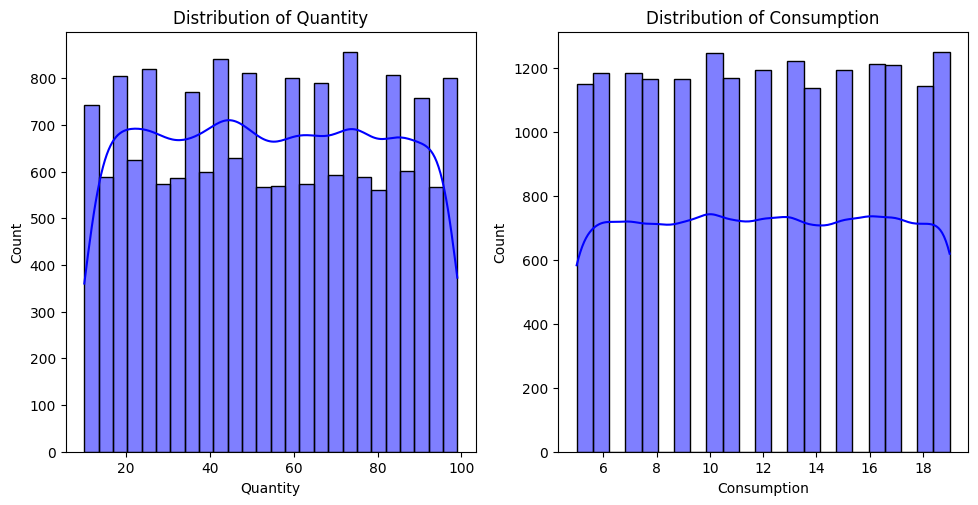

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

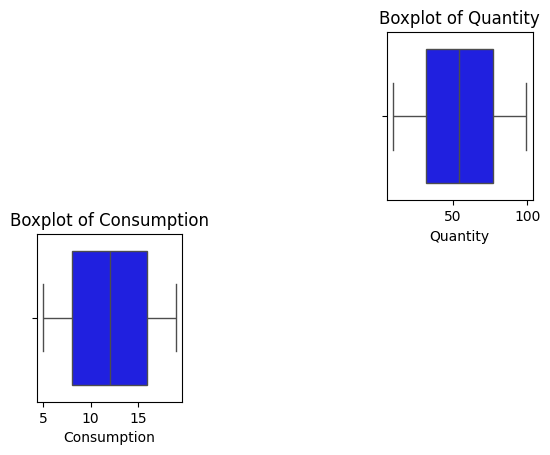

In [55]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [32]:
## Handling outliers using z-score
# import numpy as np
# from scipy import stats

# df = pd.DataFrame(df)

# # Calculate the z-scores for 'Consumption' and 'Quantity'
# df['zscore_consumption'] = (df['Consumption'] - df['Consumption'].mean()) / df['Consumption'].std()
# df['zscore_quantity'] = (df['Quantity'] - df['Quantity'].mean()) / df['Quantity'].std()

# # Set the threshold (e.g., 2.5 or 3.0)
# threshold = 3.0

# # Identify outliers where z-score exceeds the threshold
# outliers_consumption = df[np.abs(df['zscore_consumption']) > threshold]
# outliers_quantity = df[np.abs(df['zscore_quantity']) > threshold]

# # Print outliers
# print("Outliers in Consumption:")
# print(outliers_consumption)

# print("\nOutliers in Quantity:")
# print(outliers_quantity)

Outliers in Consumption:
      Dealer_ID Product_ID        Date  Quantity  Consumption  Location  \
247        D000       P002  2022-03-08     990.0        190.0  New York   
273        D000       P003  2022-01-04     990.0        190.0  New York   
326        D000       P003  2022-02-27     990.0        190.0  New York   
820        D000       P009  2022-01-11     990.0        190.0  New York   
1397       D000       P015  2022-02-18     990.0        190.0  New York   
...         ...        ...         ...       ...          ...       ...   
16803      D009       P006  2022-03-04     990.0        190.0  New York   
16973      D009       P008  2022-02-24     990.0        190.0  New York   
17437      D009       P013  2022-03-08     990.0        190.0  New York   
17777      D009       P017  2022-02-18     990.0        190.0  New York   
17788      D009       P017  2022-02-29     990.0        190.0  New York   

       zscore_consumption  zscore_quantity  
247             13.218071    

In [118]:
# Set z-score threshold (positive and negative)
# threshold = 3.0

# # Filter out values where z-scores are either too high or too low (absolute z-score > 3.0)
# filtered_df = df[(df['zscore_consumption'] > -threshold) & (df['zscore_consumption'] < threshold) &
#                  (df['zscore_quantity'] > -threshold) & (df['zscore_quantity'] < threshold)]

# print("Data after filtering out high and low outliers:")
# print(filtered_df)


In [56]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


## Categorical values present in the dataset

In [57]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())


Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


## Defining Numerical and categorical values

In [58]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Quantity', 'Consumption']

We have 4 categorical features : ['Dealer_ID', 'Product_ID', 'Date', 'Location']


## Adding Consumption level column

In [59]:
## Adding column requirement based on Quantity and Consumption
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [62]:
# Create a new categorical target column
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [63]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


## 1. Exploring the project
# 1.1 Visualize Quantity and consumption distribution to make some conclusion.
--> Histogram and Kernel Density Estimate(KDE)

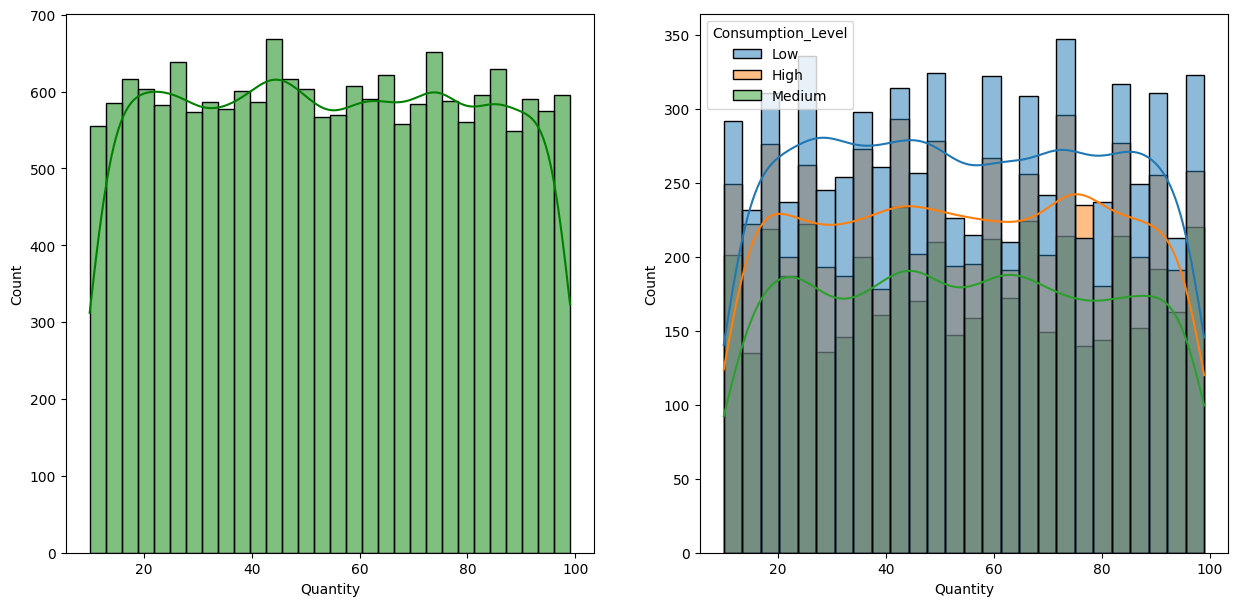

In [66]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

# The image contains two histograms with KDE (Kernel Density Estimation) overlays. Below are key insights from both plots:

## Left Plot (Overall Quantity Distribution)
1. The Quantity values are evenly distributed across the entire range (from ~0 to 100).
2. The frequency of occurrences is relatively uniform, indicating that quantity values are not skewed toward any particular range.
3. The KDE curve is mostly flat, with minor fluctuations, reinforcing the idea of a near-uniform distribution.
4. There are no extreme peaks or dips, meaning no particular quantity range is overly dominant.

## Right Plot (Quantity Distribution by Consumption Level)
1. The Low Consumption Level (blue) has the highest frequency across most bins.
2. Medium Consumption (green) and High Consumption (orange) are distributed fairly evenly, but Medium Consumption is the least frequent.
3. The KDE curves suggest:
     1. Low Consumption is the most common category throughout.
     2. High Consumption is more concentrated in specific ranges.
     3. Medium Consumption is relatively stable but lower in frequency.
4. This indicates that most products or customers fall into the Low Consumption category, while High Consumption is less frequent.
## Key Takeaways
1. The overall distribution suggests a diverse range of quantities with no extreme bias.
2. Low Consumption dominates the dataset, meaning the model may predict this class more often.

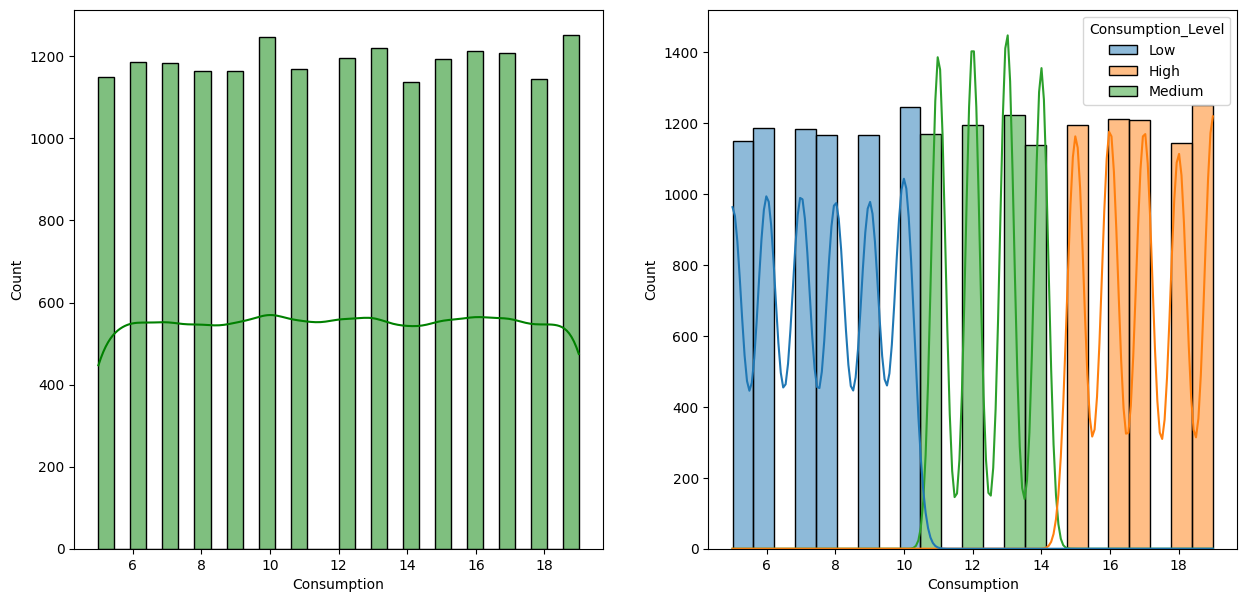

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

# The image contains two histograms with KDE overlays, showing consumption distributions. Below are the insights:

## Left Plot (Overall Consumption Distribution)
1. The consumption values are spread out between 5 and 19.
2. The distribution is fairly uniform, with no significant peaks or dips.
3. The KDE curve is relatively stable, indicating that consumption values occur at almost equal frequencies.
4. There is no clear skew, meaning that all consumption levels appear to be relatively balanced.

## Right Plot (Consumption Distribution by Consumption Level)
1. The data is segmented into three categories: Low, Medium, and High Consumption Levels.
2. Low Consumption (blue) is dominant in the 5 to 10 range.
3. Medium Consumption (green) is concentrated between 11 and 14.
4. High Consumption (orange) starts around 15 and goes up to 19.
5. Each consumption level has a well-defined range with minimal overlap, meaning the categories are distinct.
6. The KDE curves indicate some oscillations in frequency, especially for Low and High consumption levels.

## Key Takeaways
1. The dataset has clear separation between Low, Medium, and High consumption levels.
2. Most data points in the Low category are clustered around 5-10, while High consumption is concentrated in the upper range (15-19).
3. There might be a potential threshold effect, where consumption values naturally fall into these three groups.

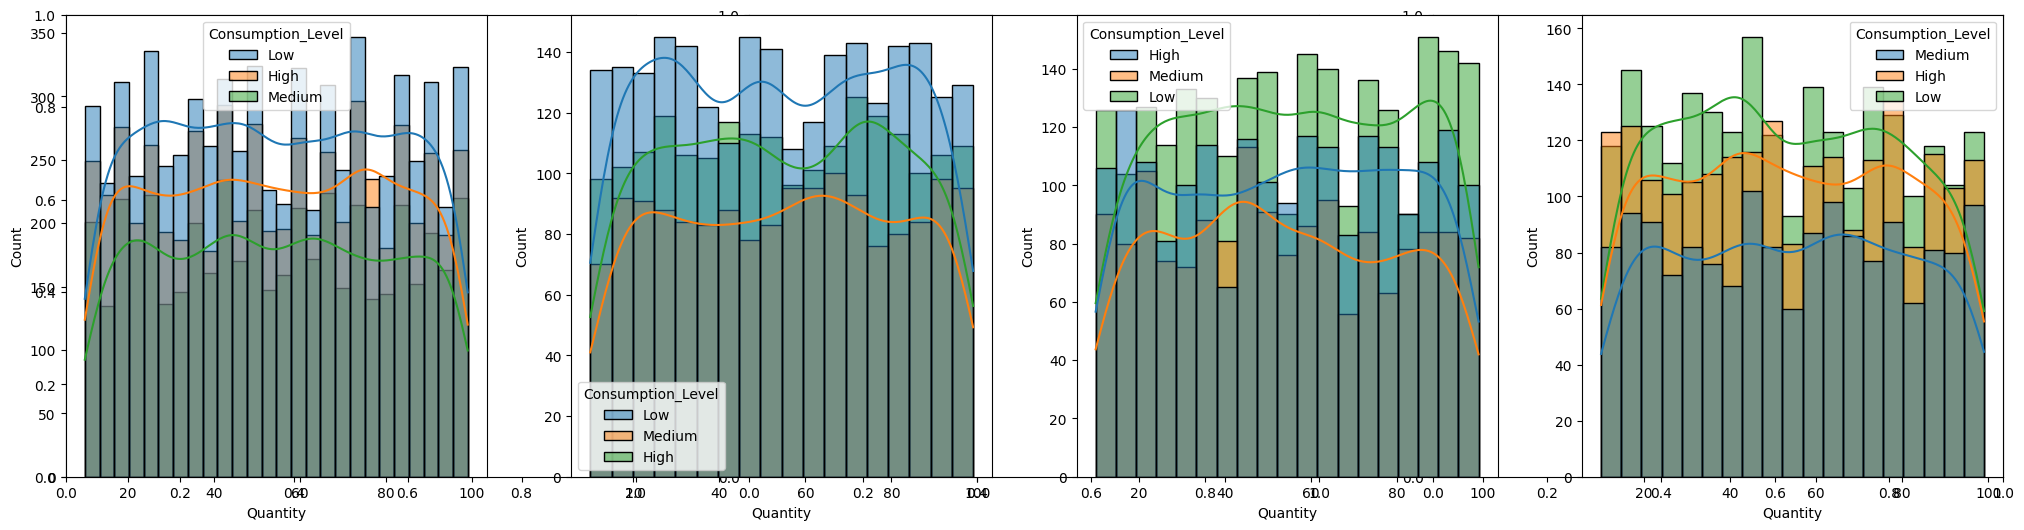

In [69]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

## Insights on above plots

# Balanced Distribution Across Quantity:

1. The Quantity values seem to be fairly evenly distributed across the three consumption levels.
2. There are no extreme skews or clear separations among the classes.

# Consumption Levels Overlap:

1. The three consumption categories (Low, Medium, High) show overlapping density curves.
2. This suggests that Quantity alone might not be a strong differentiator for Consumption_Level.

# Possible Trends in KDE Curves:

1. The Low Consumption (blue line) appears more frequent at lower quantity values.
2. The Medium Consumption (orange line) is spread across the middle.
3. The High Consumption (green line) has peaks toward the higher quantity values.

In [119]:
# plt.subplots(1,3,figsize=(25,6))
# plt.subplot(141)
# sns.histplot(data=df,x='Date',kde=True,hue='Consumption_Level')
# plt.subplot(142)
# sns.histplot(data=df[df.Location=='Chicago'],x='Date',kde=True,hue='Consumption_Level')
# plt.subplot(143)
# sns.histplot(data=df[df.Location=='Los Angeles'],x='Date',kde=True,hue='Consumption_Level')
# plt.subplot(144)
# sns.histplot(data=df[df.Location=='New York'],x='Date',kde=True,hue='Consumption_Level')

# plt.show()

In [120]:
#  ## Maximumum Quatity and consumption
# plt.figure(figsize=(18,8))
# plt.subplot(1, 4, 1)
# plt.title('Quantity')
# sns.violinplot(y='Quantity',data=df,color='red',linewidth=3)
# plt.subplot(1, 4, 2)
# plt.title('Consumption')
# sns.violinplot(y='Consumption',data=df,color='green',linewidth=3)
# plt.subplot(1, 4, 3)
# plt.title('Ratios')
# sns.violinplot(y='Quantity_consumption_ratios',data=df,color='blue',linewidth=3)
# plt.show()


## 1.2 Multivariate analysis using pieplot

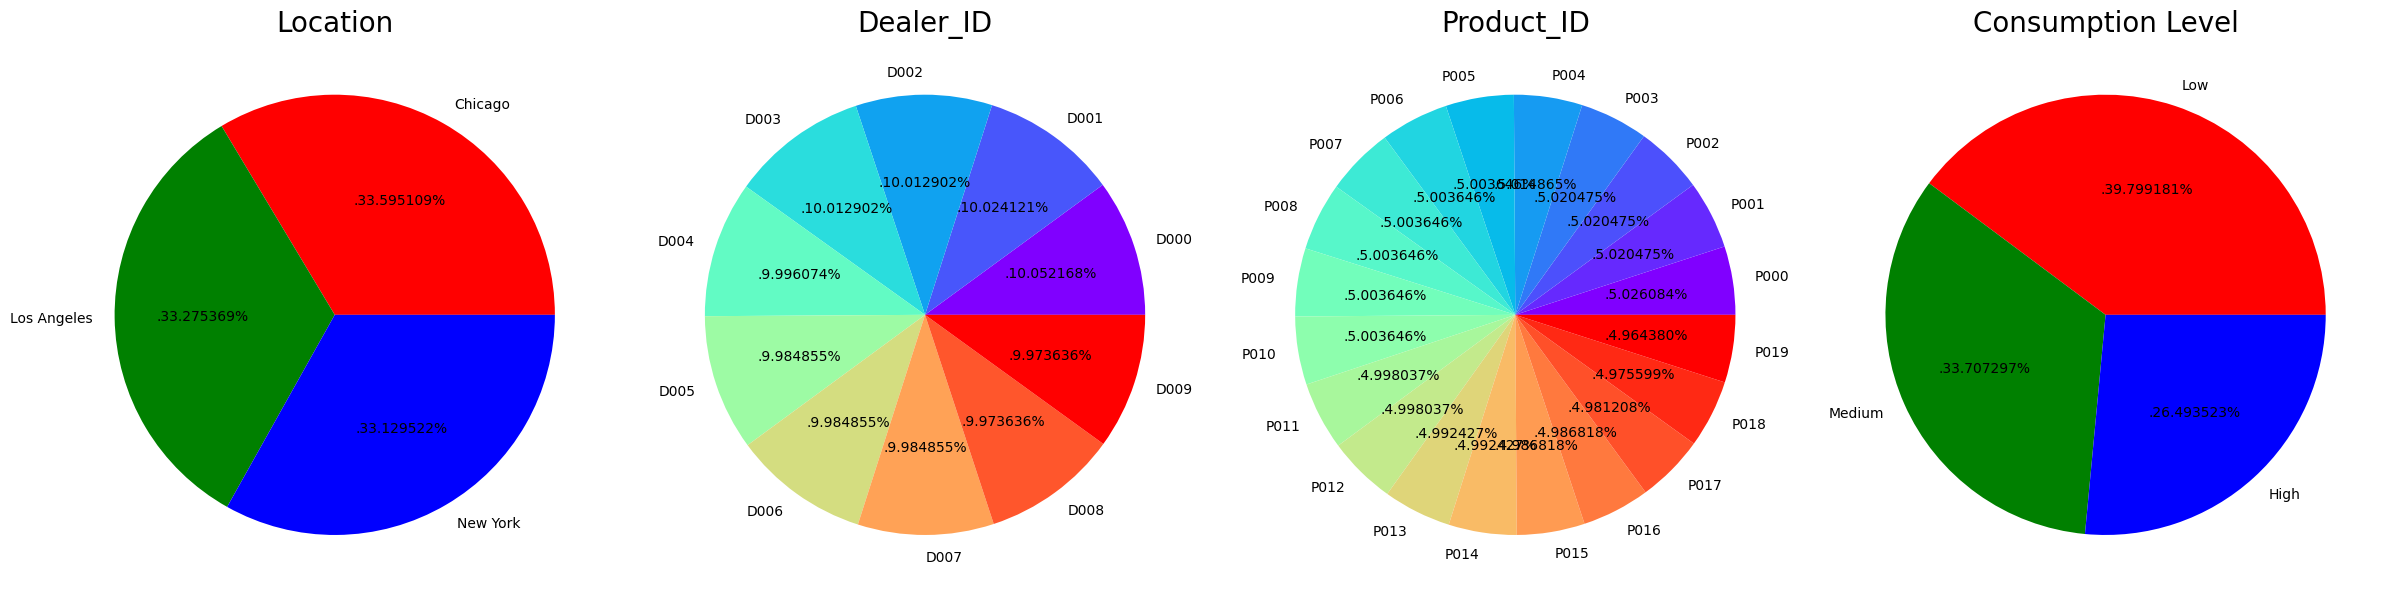

In [75]:
## Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = 'Chicago', 'Los Angeles','New York'
color = ['red','green','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = 'D000', 'D001','D002','D003','D004','D005','D006','D007','D008','D009'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Dealer_ID', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = 'P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Product_ID', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Consumption_Level'].value_counts()
labels = 'Low', 'Medium','High'
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Consumption Level', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Location Distribution:
    The data is almost evenly split among the three cities:
    1. Chicago (~33.6%)
    2. Los Angeles (~33.3%)
    3. New York (~33.1%)
    4. This suggests that sales or consumption data is well-balanced across locations, meaning location alone may not be a strong predictor of consumption behavior.
# Dealer_ID Distribution:
    1. All 10 dealers have nearly equal representation (~10%) in the dataset.
    2. This indicates that no single dealer dominates the sales, making the dataset more diverse and preventing dealer bias.
#  Product_ID Distribution:
    1. The distribution of products is almost uniform, with each product making up about 5% of the dataset.
    2. There is no extreme dominance of a single product, which suggests that different products contribute evenly to sales/consumption.
# Consumption Level Distribution:
    1. Low Consumption is the largest category (~39.8%).
    2. Medium Consumption makes up about 33.7%.
    3. High Consumption is the smallest group at 26.5%.
    The imbalance in consumption levels suggests that most products or locations tend to fall into the low-to-medium consumption range, while high consumption is less common

## 1.3 Feature Wise Visualization

## 1.3.1 LOCATION COLUMN

## UNIVARIATE ANALYSIS ON LOCATION COLUMN

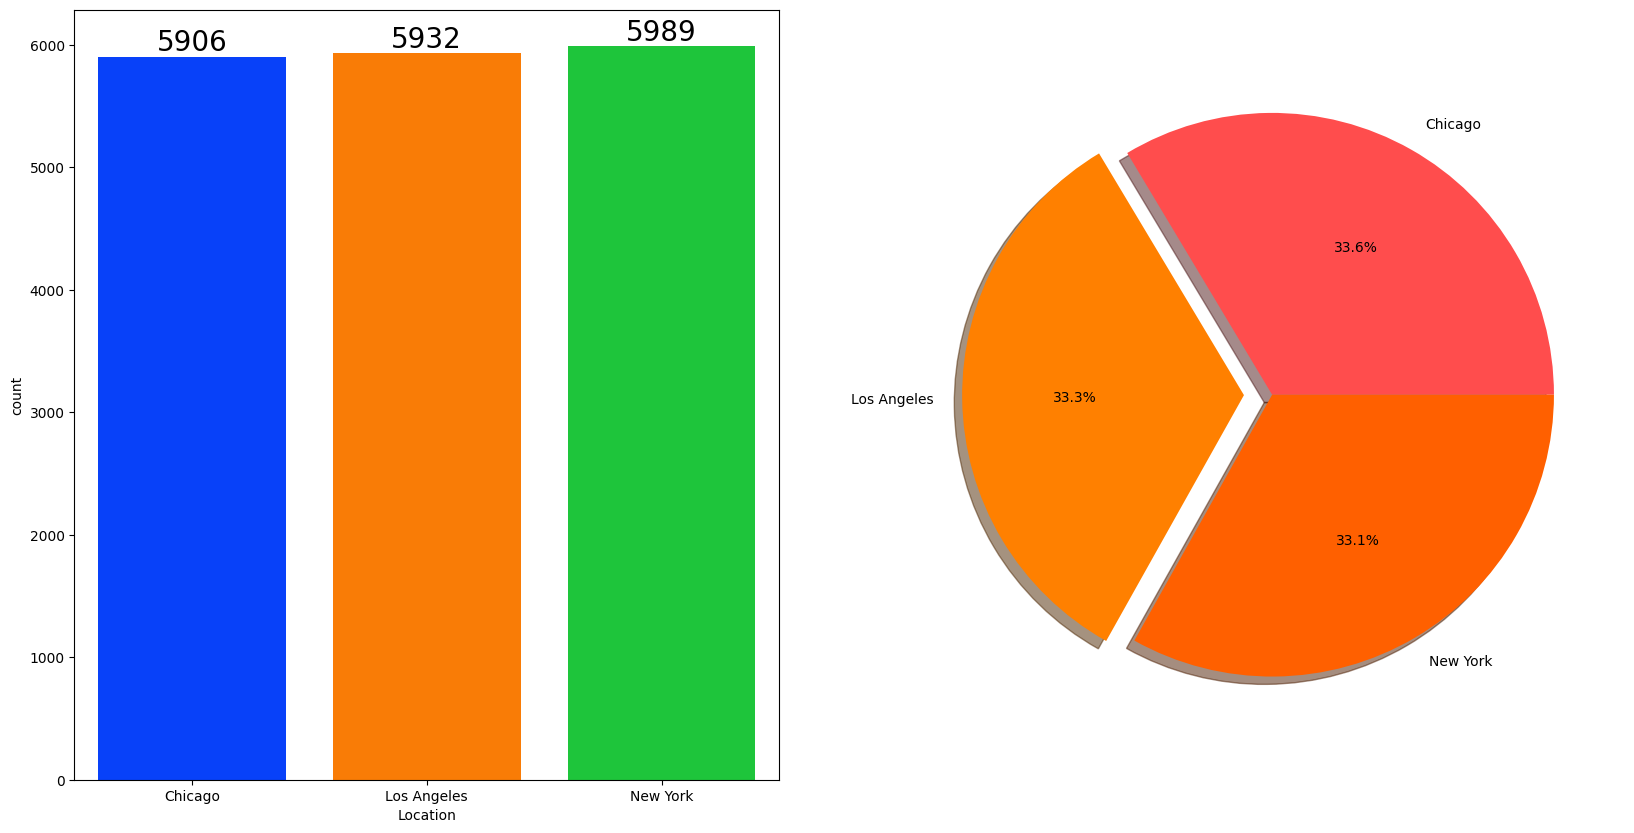

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

## BIVARIATE ANALYSIS ( Is Location has any impact on Consumption ? )

In [81]:
location_group = df.groupby('Location')
location_group

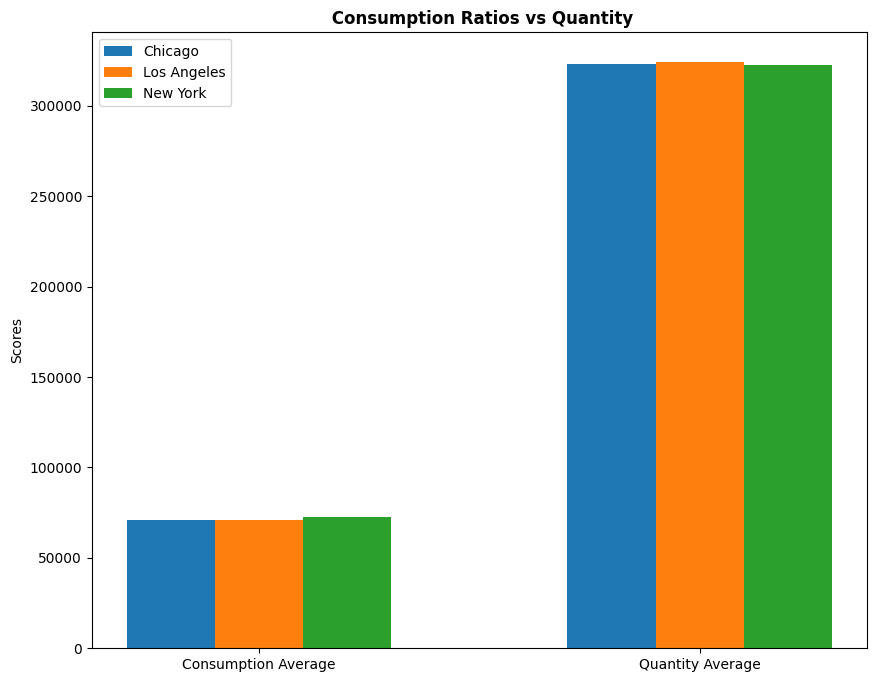

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Grouping by 'Location' and aggregating using the sum of the relevant columns
location_group = df.groupby('Location').sum()
# Extracting the required data from the aggregated DataFrame
chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]

# Plot
plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))

# Plot the bars with proper offsets for each city
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York')

# Set the x-axis labels and the chart's title
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title(" Consumption Ratios vs Quantity", fontweight='bold')

# Show legend and plot
plt.legend()
plt.show()


### The bar chart provides a comparison of Consumption Average and Quantity Average across three cities: Chicago, Los Angeles, and New York.

## Key Insights:
# Higher Quantity Average:

1. The Quantity Average is significantly higher than the Consumption Average for all three cities.
2. This suggests that while consumption values are relatively low, the total quantity available or used is much larger.

# Similar Trends Across Cities:

1. All three cities (Chicago, Los Angeles, New York) show very similar values for both metrics.
2. There is no major disparity between them, indicating uniform consumption and quantity patterns.

# Slight Variation in Consumption Average:

1. New York has the highest Consumption Average, followed closely by Los Angeles and Chicago.
2. However, the differences are minimal, meaning that consumption per unit (or per capita) is fairly consistent.

# Implication of the Trends:

1. The high quantity average might indicate a large supply base or distribution network.
2. The relatively lower consumption average suggests that not all available quantity is being consumed.

## 1.3.2 DEALER COLUMN
## Univariate analysis for dealers

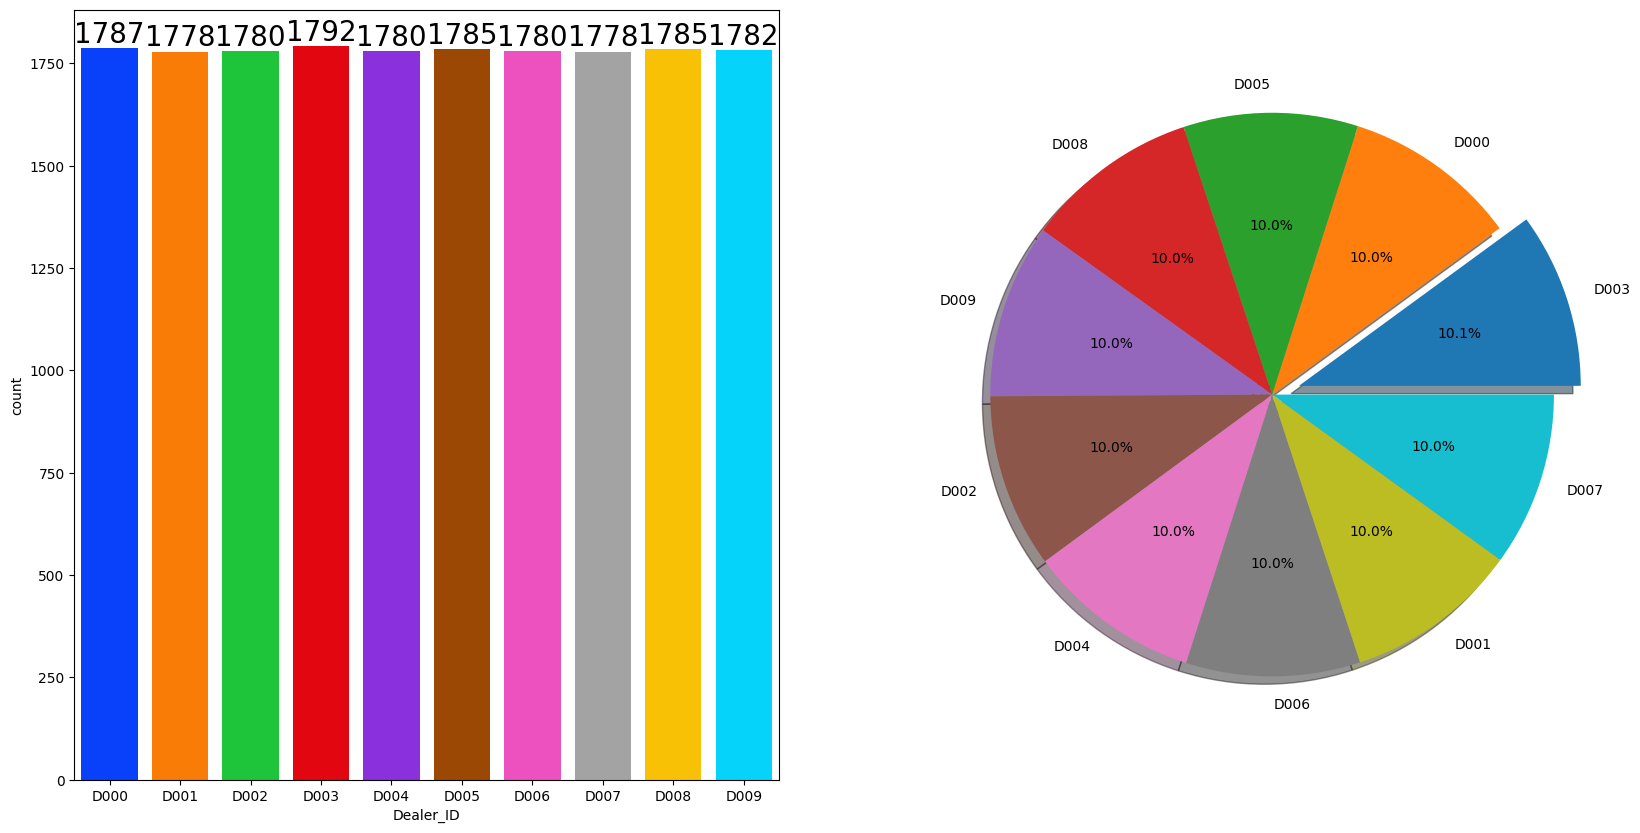

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

# Insights on the Above Plot
# The image contains two visualizations:

## Left Plot (Bar Chart - Dealer ID vs. Count)
## Right Plot (Pie Chart - Dealer ID Proportion)
1. Bar Chart (Left)
    -> This chart represents the count of occurrences for each Dealer ID (D000 to D009).
    -> The counts are almost equal across all dealers, ranging around 1780 to 1792.
    -> There is no significant variation, meaning all dealers have approximately the same level of activity.
    -> This suggests a well-distributed dataset where each dealer has nearly identical transaction or sales counts.
2. Pie Chart (Right)
    -> This pie chart confirms the equal distribution seen in the bar chart.
    -> Each dealer's share is almost 10%, which aligns with having 10 dealers with nearly equal counts.
    -> The slice labeled D003 is slightly larger (10.1%) and is also "exploded" for emphasis.
    -> Since the variations are minimal, no single dealer dominates the distribution.
## Key Takeaways
    -> Uniform distribution: All dealers contribute almost equally to the dataset.
    -> Balanced dataset: No major outliers or significant disparities.
    -> D003 Slightly Higher: Though marginal, it has a slightly higher count than others.

## BIVARIATE ANALYSIS ( Is Dealer  has any impact on consumption ? )

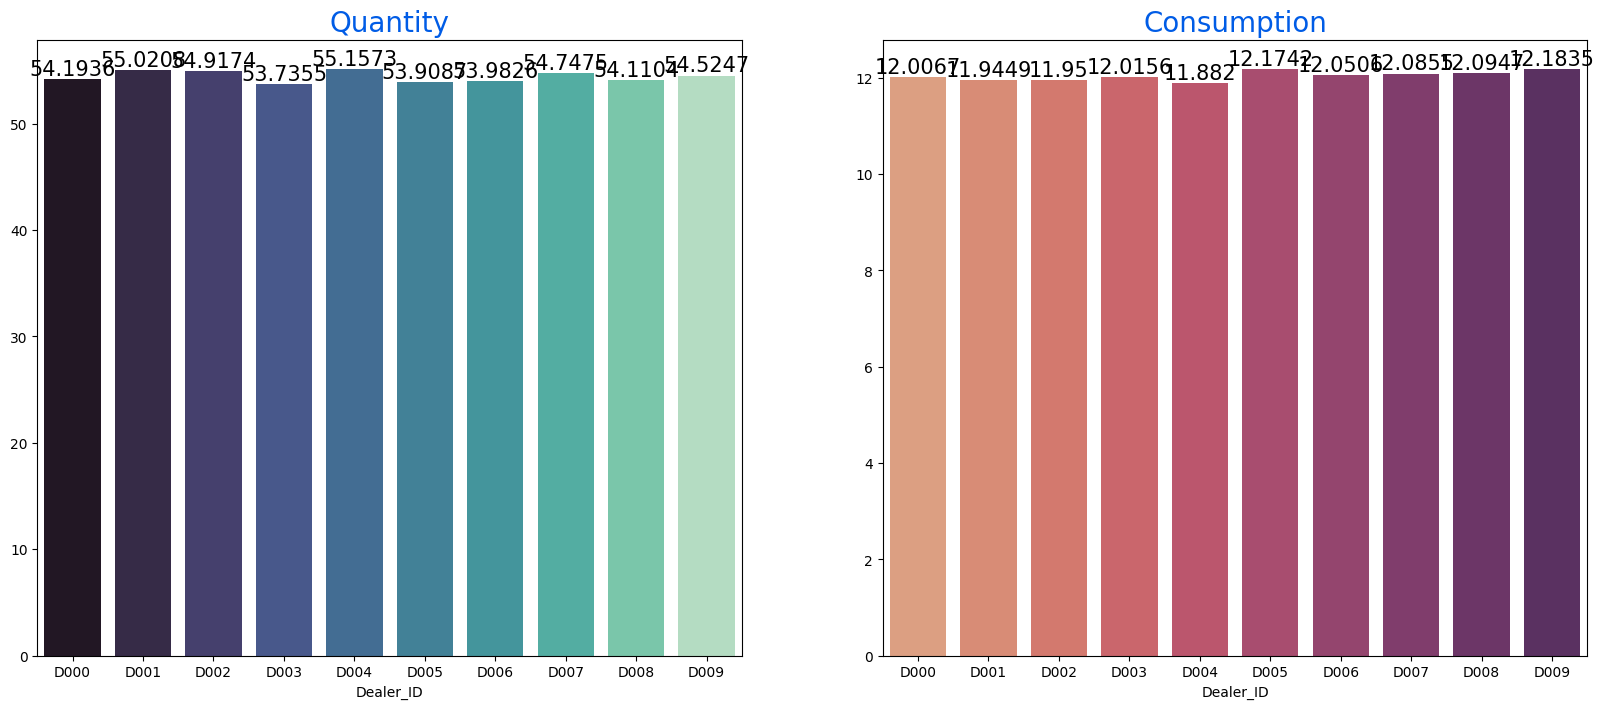

In [102]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


## Insights on the Above Plot
## The image contains two bar charts:

# Left Chart - Quantity per Dealer
# Right Chart - Consumption per Dealer
1. Left Chart (Quantity)
    -> Represents the quantity of items associated with each Dealer ID (D000 to D009).
    -> The values are relatively close, with the range between 53.73 to 55.15.
    -> Dealer D004 has the highest quantity (55.15), while D003 has the lowest (53.73).
    -> The variation is minimal, indicating that all dealers handle almost the same quantity.
2. Right Chart (Consumption)
    -> Represents consumption per dealer.
    -> The values are again very close, ranging from 11.88 to 12.18.
    -> Dealer D009 has the highest consumption (12.18), while D005 has the lowest (11.88).
    -> The variation is very small, meaning all dealers have a nearly equal consumption rate.
## Key Takeaways
    -> Balanced Distribution: Both quantity and consumption are uniformly distributed across all dealers.
    -> No Major Outliers: The differences are minimal, meaning all dealers contribute equally to the dataset.
    -> D004 leads in Quantity, while D009 leads in Consumption, but the differences are not significant

## 1.3.3 PRODUCT COLUMN

# UNIVARIATE ANALYSIS ( What is the most product most used? )

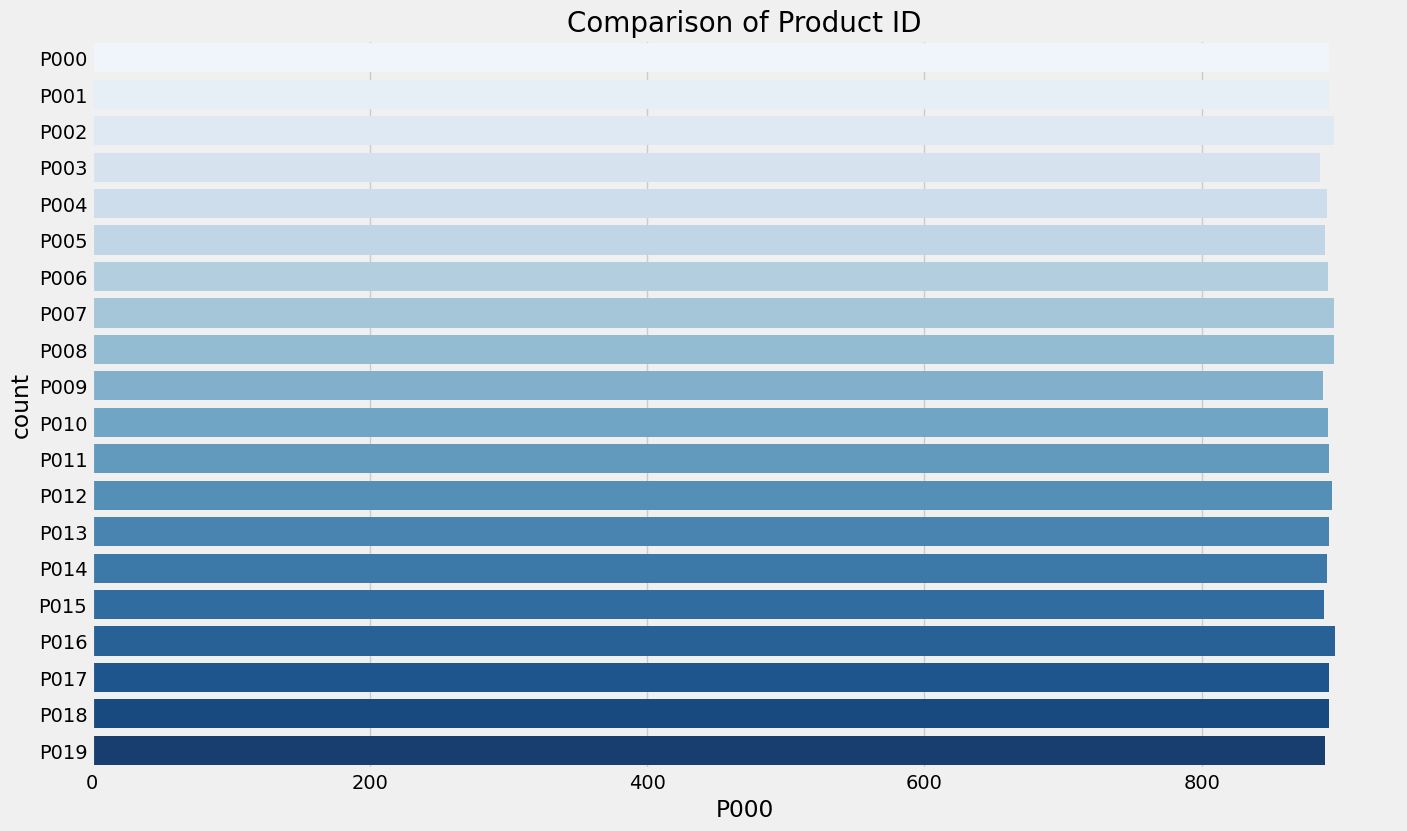

In [107]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

# Insights on the Above Plot
## The image is a horizontal bar chart visualizing the count of different Product IDs (P000 to P019).

## Observations

# Gradient-Based Distribution:

1. The chart uses a dark-to-light gradient to represent the count.
2. P000 has the lowest count, while P019 has the highest count.
3. The values increase progressively from P000 to P019.

# Uniform Growth:

1. The counts seem to increase in a nearly linear fashion.
2. No major spikes or dips, suggesting a consistent trend.

# Top vs. Bottom Products:

1. P019, P018, and P017 have the highest counts.
2. P000, P001, and P002 have the lowest counts.
3. This might indicate that newer or more popular products have higher demand.

# Key Takeaways
1. Steady Demand Increase: Product counts increase systematically from P000 to P019, hinting at a possible product lifecycle trend.
2. Even Distribution: No major fluctuations indicate a controlled distribution process.
3. Market Trend? The higher count for later product IDs suggests they could be newer, better-performing, or more in demand.

# BIVARIATE ANALYSIS ( Is product id  has any impact on consumption ? )

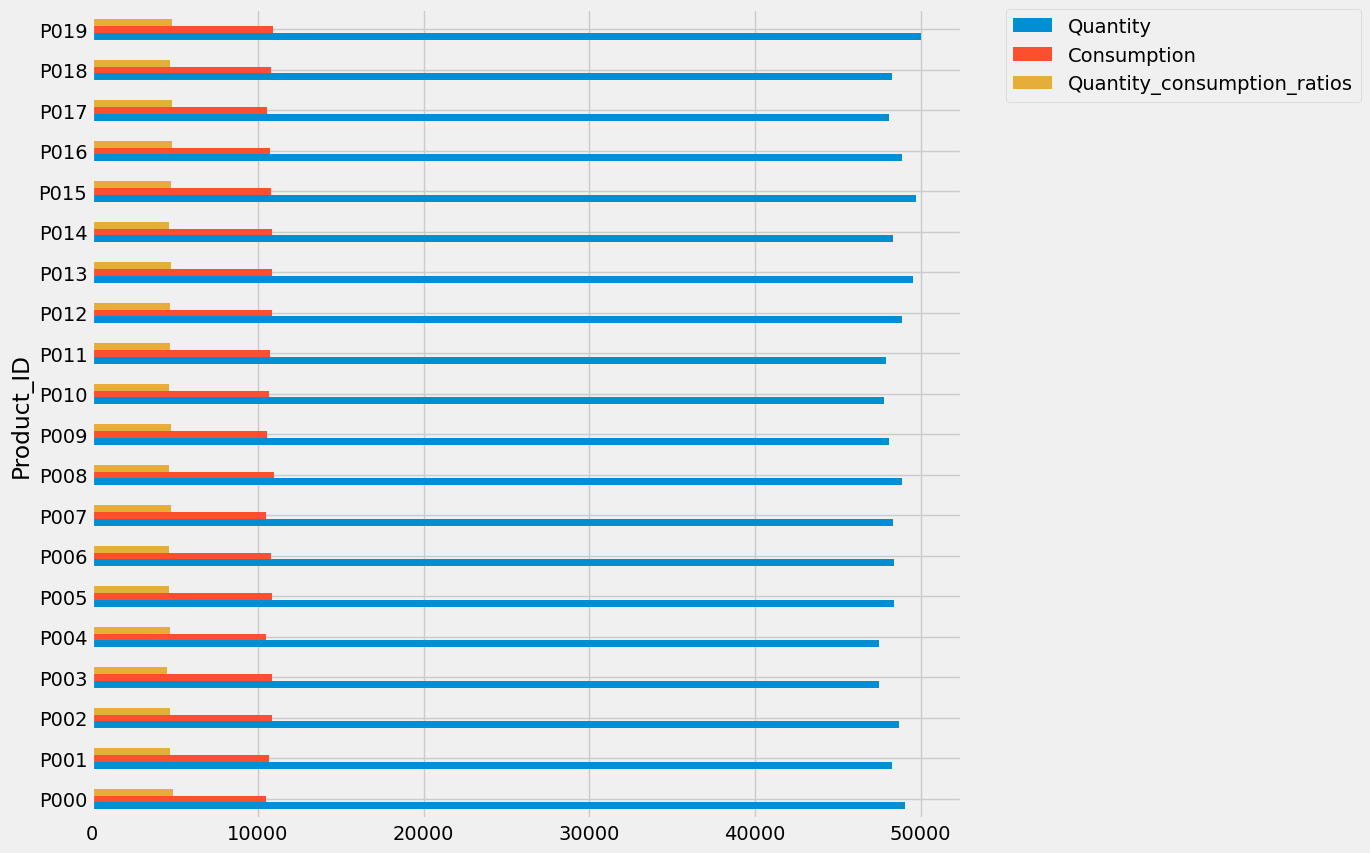

In [109]:
df.groupby('Product_ID').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Insights on the Above Plot
# This horizontal bar chart compares three key metrics for each Product ID (P000 to P019):

# Quantity (Blue)
1. Consumption (Red)
2. Quantity-to-Consumption Ratio (Yellow)
3. Observations

# Quantity is significantly higher than Consumption:

1. The blue bars (Quantity) dominate the chart, meaning more products are available than consumed.
2. This might indicate overproduction, stockpiling, or lower demand for certain products.

# Consumption is much lower:
1. The red bars (Consumption) are relatively short, suggesting only a small portion of the available quantity is actually used.
2. This pattern is consistent across all products.

# Quantity-to-Consumption Ratio (Yellow) is minimal:

1. The yellow bars are very short, meaning the ratio is low.
2. This means a large gap exists between production (or stock) and actual usage.
3. High ratios could indicate wastage, inefficiency, or poor demand forecasting.

# Consistent Trends Across Products:

1. The same trend is observed across all Product IDs.
2. No significant outliers, meaning the imbalance is a systematic issue rather than a product-specific one.

# Key Takeaways
✔ Potential Overstocking: Since Quantity >> Consumption, there could be excess inventory.
✔ Inefficiency in Demand Planning: A low consumption rate suggests demand is lower than expected.
✔ Opportunity to Optimize Production & Distribution: Reducing quantity or boosting consumption strategies (e.g., marketing, promotions) could help balance supply and demand.

## Date column

In [113]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [121]:
# plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-v0_8-talk')  # or any other style from the available list
# sns.countplot(df['Date'], palette = 'PuBu')
# plt.title('Comparison of different types of dates', fontweight = 30, fontsize = 20)
# plt.xlabel('types of dates')
# plt.ylabel('count')
# plt.show()

# Checking Outliers

<Axes: ylabel='Consumption'>

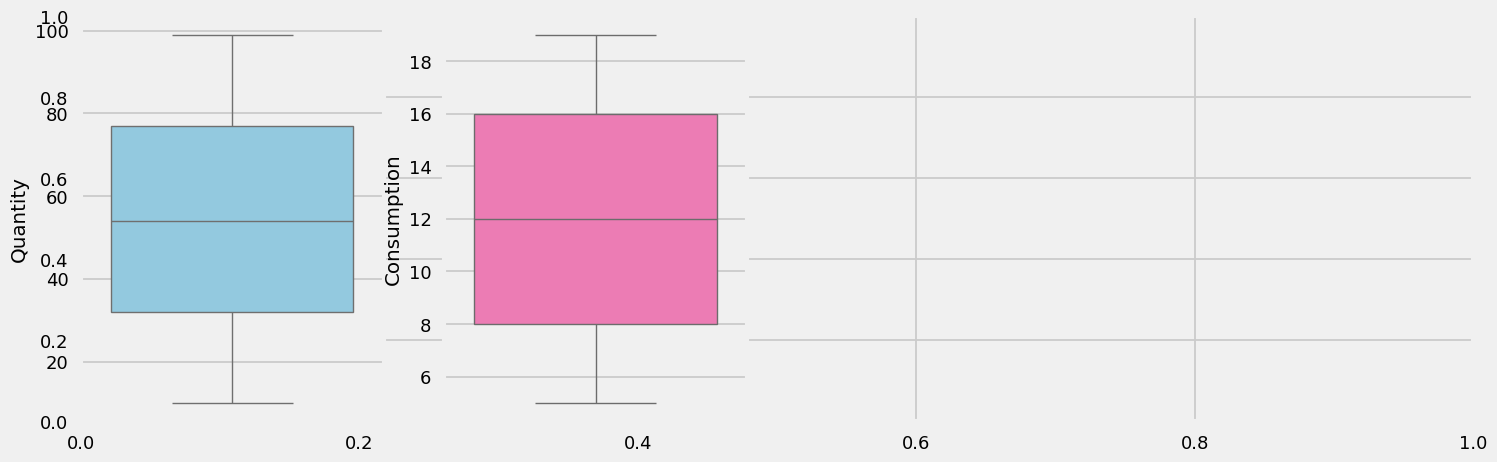

In [117]:
plt.subplots(1,1,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Quantity'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Consumption'],color='hotpink')
